#  8. Morfologické operácie

In [7]:
import numpy as np
from skimage import data, filters, draw, io, color, morphology
import matplotlib.pyplot as plt

from skimage.morphology import disk

In [2]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

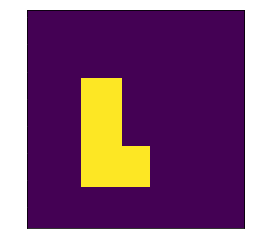

In [3]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)

In [4]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

In [5]:
eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0], SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False, False), (False, False)))

In [6]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]

        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

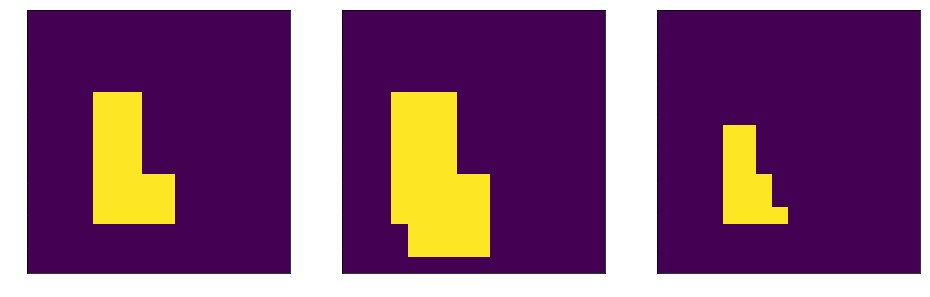

In [7]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.subplot(132)
plt.imshow(dilated_I)
plt.subplot(133)
plt.imshow(eroded_I)

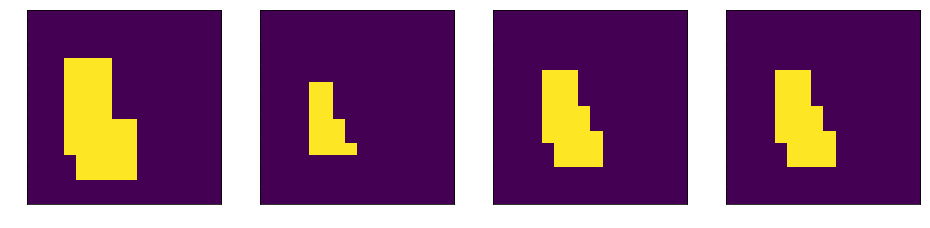

In [8]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.subplot(142)
plt.imshow(eroded_I)
plt.subplot(143)
plt.imshow(closed_I)
plt.subplot(144)
plt.imshow(open_I)

## Real world problem

Text(0.5, 1.0, 'Otsu thresh binary mask base on blue channel')

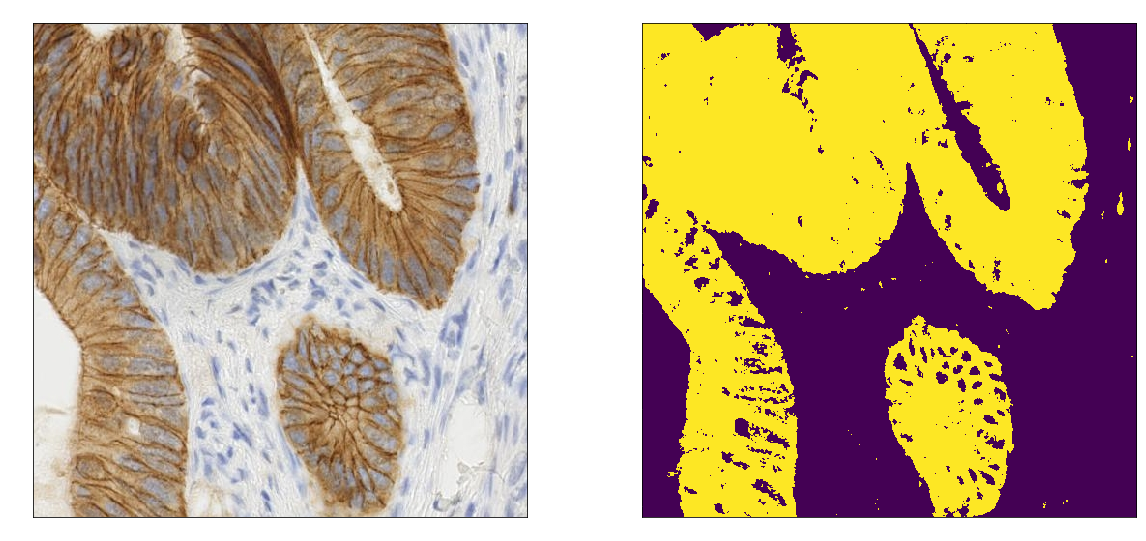

In [9]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(I3)
plt.title('Image')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
mask = B<out
plt.imshow(mask)
plt.title('Otsu thresh binary mask base on blue channel')

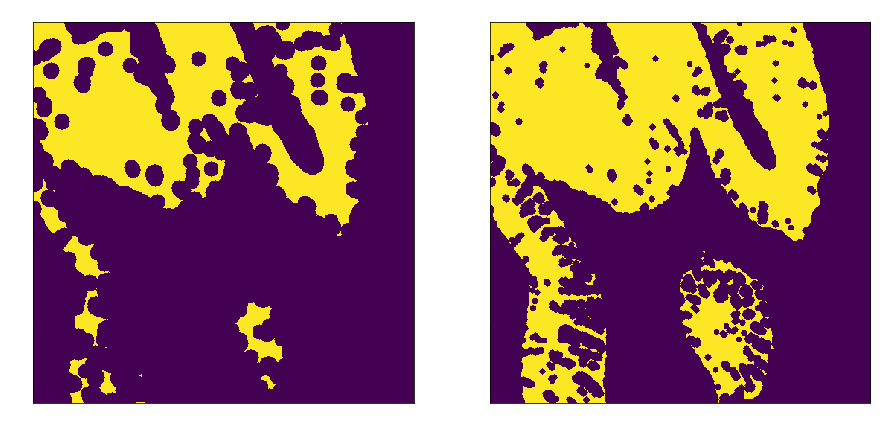

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(mask,morphology.disk(4)))

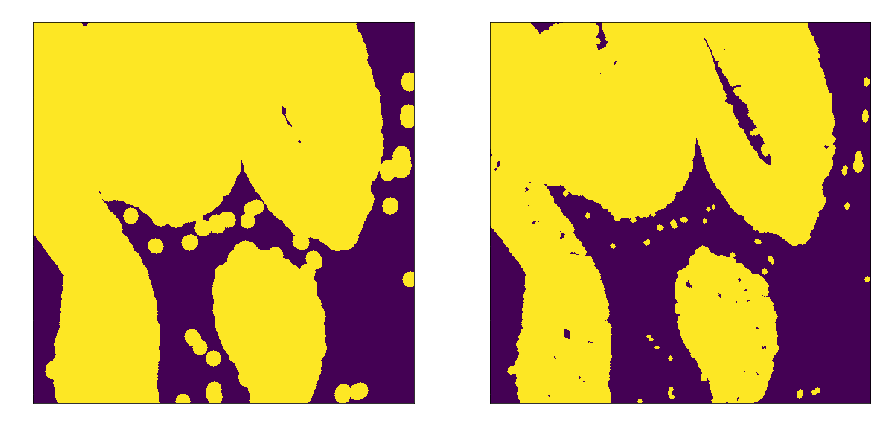

In [11]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilation 10 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilation 2 px disk')
plt.imshow(morphology.dilation(mask,morphology.disk(3)))

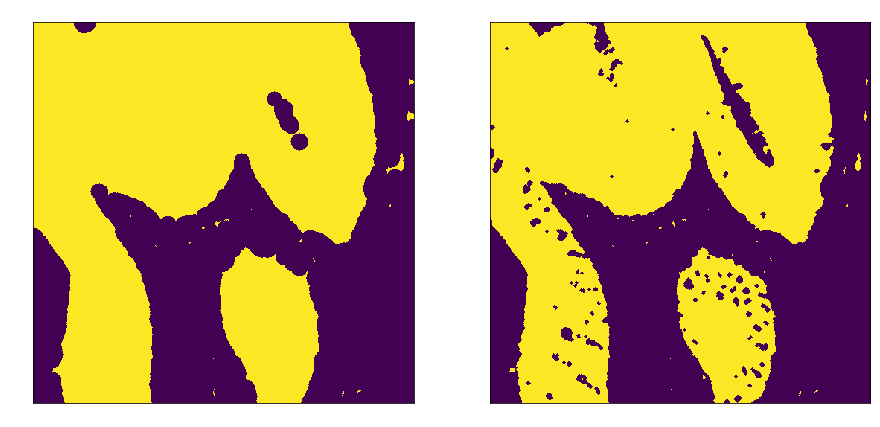

In [12]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(mask,morphology.disk(2)))

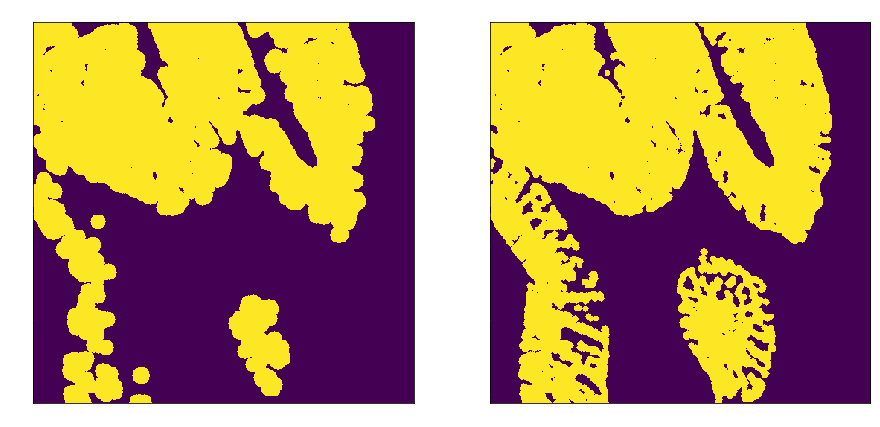

In [13]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(mask,morphology.disk(4)))

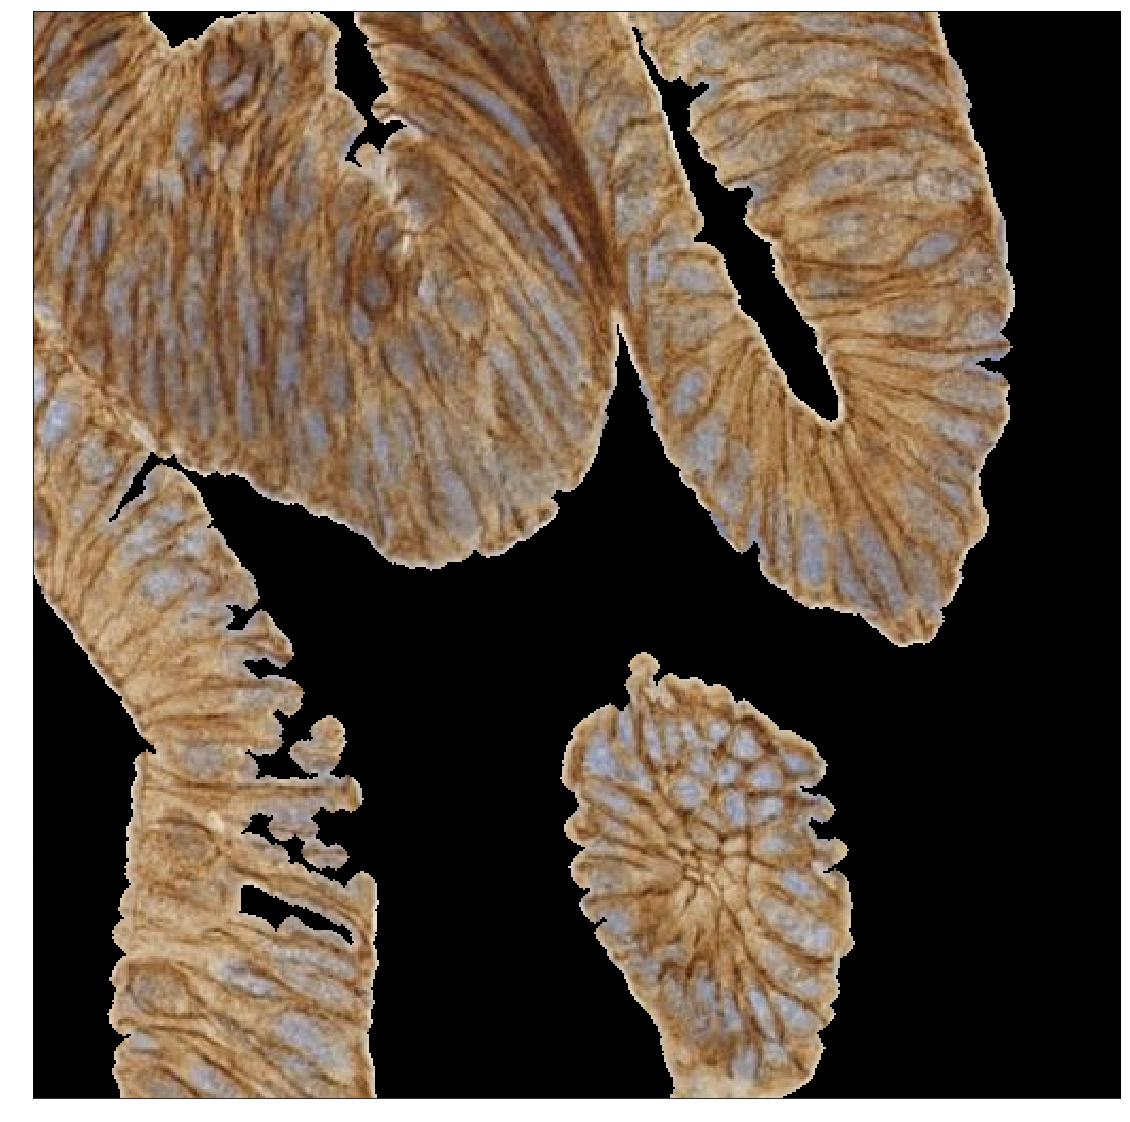

In [14]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(mask,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')

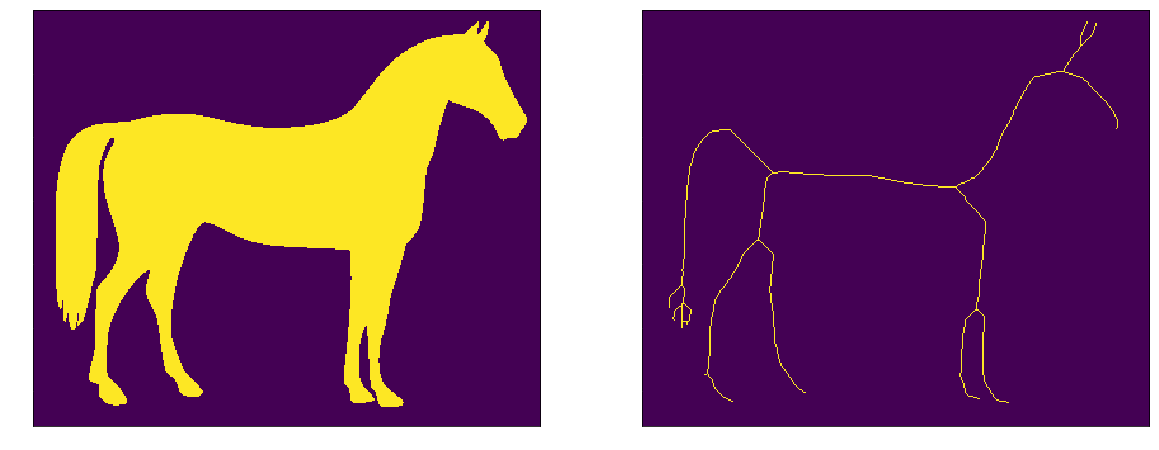

In [15]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(morphology.skeletonize(I))

# Dokoncit cvicenie  54 - 57

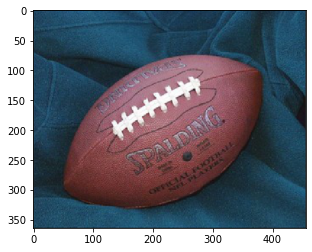

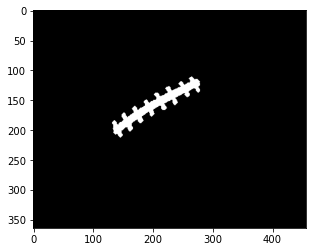

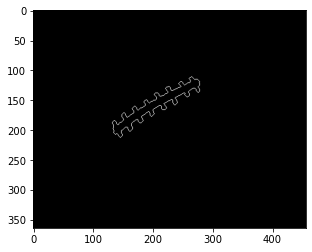

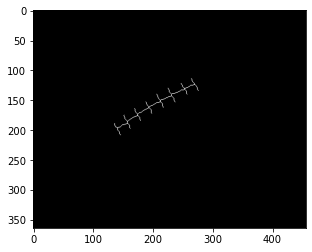

In [9]:
I = io.imread('football.png')
plt.figure()
plt.imshow(I)

I = color.rgb2gray(I)



I_mask = I > 0.77
I_mask = morphology.erosion(I_mask,morphology.disk(2))
I_mask = morphology.dilation(I_mask,morphology.disk(2))

plt.figure()
plt.imshow(I_mask, cmap = 'gray')

I_new = np.logical_xor(I_mask, morphology.erosion(I_mask,morphology.disk(1)))

plt.figure()
plt.imshow(I_new, cmap = 'gray')

plt.figure()
plt.imshow(morphology.skeletonize(I_mask), cmap = 'gray')

In [10]:
SE = np.array([[1,1,1]])
I = np.random.randint(0, high=25, size=(5,5))
print(I)
print(morphology.dilation(I,SE))

[[ 1  1 11  1 15]
 [ 3  2 21 18 18]
 [19  9  1  3 24]
 [17  3  8  0 14]
 [10 16  2  6  3]]
[[ 1 11 11 15 15]
 [ 3 21 21 21 18]
 [19 19  9 24 24]
 [17 17  8 14 14]
 [16 16 16  6  6]]


0.8


<Figure size 432x288 with 0 Axes>

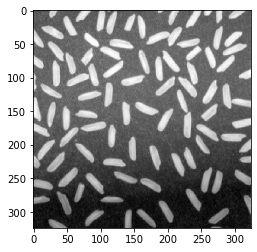

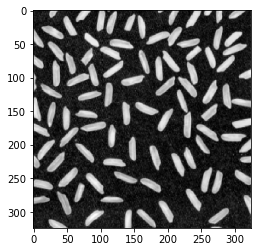

In [14]:
I = color.rgb2gray(io.imread('rice.png'))
print(np.max(I))
plt.figure()
plt.figure()
plt.imshow(I, cmap = 'gray')

plt.figure()
I1 = I - morphology.opening(I, morphology.disk(25))
plt.imshow(I1, cmap="gray")

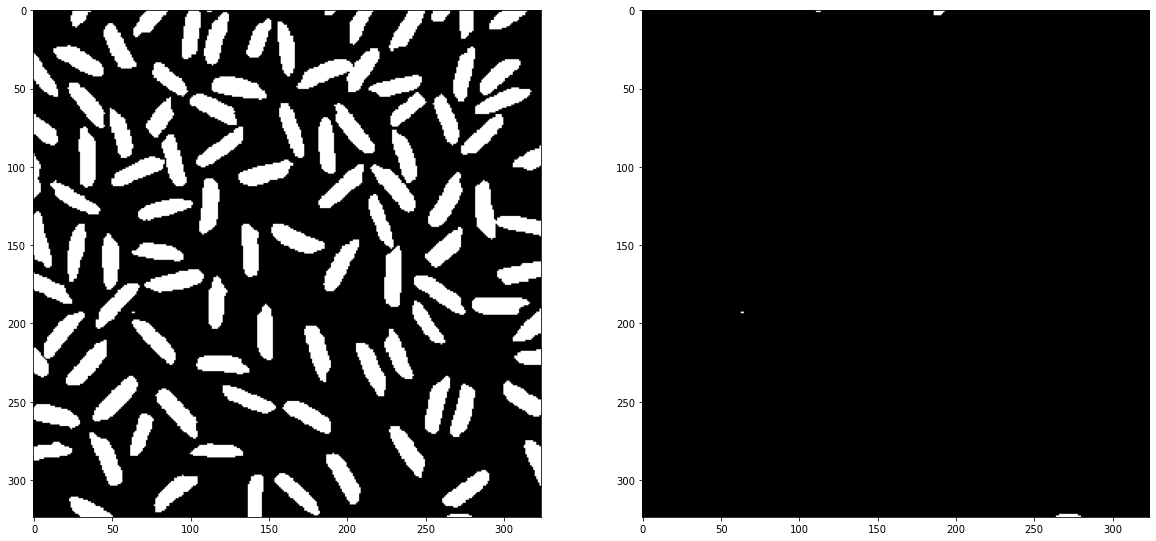

In [15]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
I2 = I1 > 0.2
plt.imshow(I2, cmap = 'gray')

I3 = morphology.remove_small_objects(I2, min_size=50)
plt.subplot(1,2,2)
plt.imshow(np.logical_xor(I3, I2), cmap = 'gray')

Text(0.5, 1.0, 'Erosion')

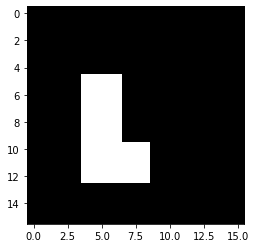

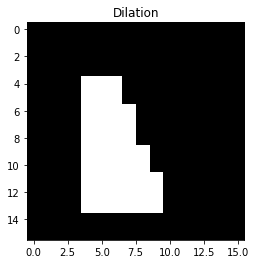

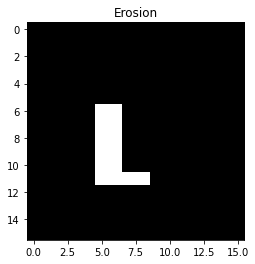

In [17]:
from scipy import signal
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I

SE = np.array([[1, 0],[1, 0],[1, 1]])
SE = SE / np.sum(SE)



plt.figure()
plt.imshow(I, cmap='gray')

plt.figure()
plt.imshow(signal.convolve2d(I, SE, mode='same') > np.min(I), cmap='gray')
plt.title("Dilation")

plt.figure()
plt.imshow(signal.convolve2d(I, SE, mode='same') == np.max(I), cmap='gray')
plt.title("Erosion")